In [101]:
# to print all outputs in a cell instead of just the last one 
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = 'all'  # 'last_expr'  

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = 16, 10
#%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

# we will not use profiling as number of features is too high and output is too lengthy
# import pandas_profiling as pp

# to display all columns of DF
pd.set_option('display.max_columns', None)

In [102]:
#read the dataset
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

# Exploratory Data Analysis

## Description of the dataset

In [103]:
print('Dataset = {:d} observations x {:d} features (including target)'.format(train.shape[0], train.shape[1]))
train.sample(5)

Dataset = 1460 observations x 81 features (including target)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981,1987,Gable,WdShngl,WdShing,Wd Shng,None,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32,1842,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,1981.0,Fin,3,894,TA,TA,Y,857,72,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000
160,161,20,RL,NaN,11120,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Veenker,Norm,Norm,1Fam,1Story,6,6,1984,1984,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,PConc,Gd,TA,No,BLQ,660,Unf,0,572,1232,GasA,TA,Y,SBrkr,1232,0,0,1232,0,0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1984.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,162500
1439,1440,60,RL,80.0,11584,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,SLvl,7,6,1979,1979,Hip,CompShg,HdBoard,HdBoard,BrkFace,96.0,TA,TA,CBlock,TA,TA,No,GLQ,315,Rec,110,114,539,GasA,TA,Y,SBrkr,1040,685,0,1725,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1979.0,RFn,2,550,TA,TA,Y,0,88,216,0,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,197000
571,572,20,RL,60.0,7332,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1959,1959,Gable,CompShg,WdShing,Wd Shng,BrkFace,207.0,TA,TA,CBlock,TA,TA,No,BLQ,414,Unf,0,450,864,GasA,Ex,Y,SBrkr,864,0,0,864,1,0,1,0,2,1,Gd,4,Typ,0,NaN,Attchd,1959.0,Unf,1,288,TA,TA,Y,168,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,120000
445,446,20,RL,73.0,9855,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,1956,1956,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1436,1436,GasA,Fa,Y,SBrkr,1689,0,0,1689,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1956.0,Unf,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,11,2009,COD,Normal,127500


In [104]:
# computing basic statistics 
summary = pd.DataFrame(np.array([train.dtypes, 
                                 train.isnull().sum(), 
                                 train.isnull().sum() / train.shape[0] * 100, 
                                 train.nunique()]),
                       index=['Dtype', 'NullValuesCount', 'NullValuesPct', 'NbrUniqVal'],
                       columns=np.array(list(train)))

display(summary)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Dtype,int64,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,int64,object,int64,int64,int64,object,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,int64,object,int64,object,object,float64,object,int64,int64,object,object,object,int64,int64,int64,int64,int64,int64,object,object,object,int64,int64,int64,object,object,int64
NullValuesCount,0,0,0,259,0,0,1369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,0,0,0,37,37,38,37,0,38,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,690,81,81,81,0,0,81,81,0,0,0,0,0,0,0,1453,1179,1406,0,0,0,0,0,0
NullValuesPct,0,0,0,17.7397,0,0,93.7671,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.547945,0.547945,0,0,0,2.53425,2.53425,2.60274,2.53425,0,2.60274,0,0,0,0,0,0,0.0684932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,47.2603,5.54795,5.54795,5.54795,0,0,5.54795,5.54795,0,0,0,0,0,0,0,99.5205,80.7534,96.3014,0,0,0,0,0,0
NbrUniqVal,1460,15,5,110,1073,2,2,4,4,2,5,3,25,9,8,5,8,10,9,112,61,6,8,15,16,4,327,4,5,6,4,4,4,6,637,6,144,780,721,6,5,2,5,753,417,24,861,4,3,4,3,8,4,4,12,7,4,5,6,97,3,5,441,5,5,3,274,202,120,20,76,8,3,4,4,21,12,5,9,6,663


### Removing outliers
The link in the Acknowledgments section of [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques "House Prices: Advanced Regression Techniques") web site contains the following information on the dataset:  
*There are five observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will quickly indicate these points). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these five unusual observations) before assigning it to students.*  
I followed this advice and removed observations with *GrLivArea* above 4000. 

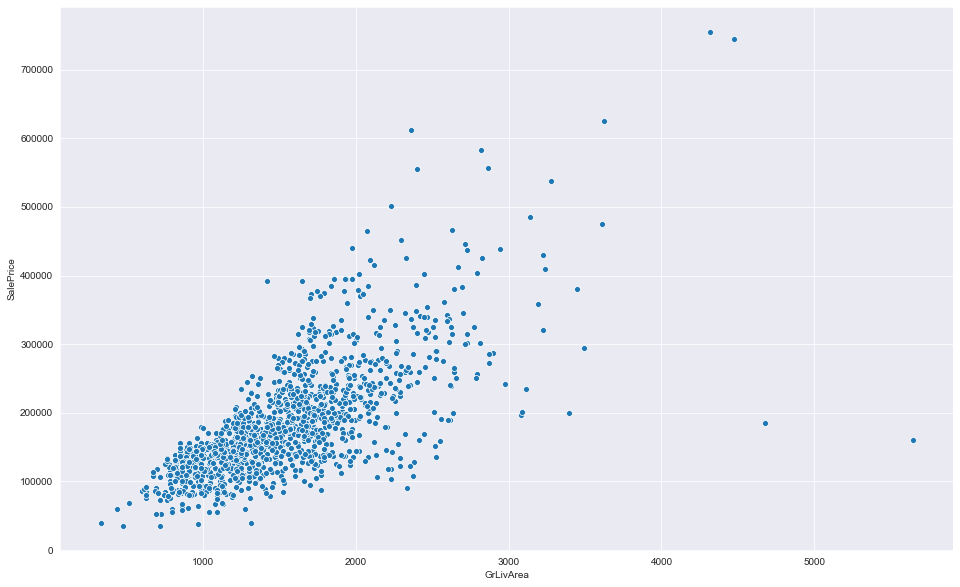

In [105]:
sns.scatterplot(x=train.GrLivArea, y=train.SalePrice);
train = train[train.GrLivArea < 4000]

## Numerical features

In [106]:
train_numeric = train.select_dtypes(include=[np.number])
print('Total of numerical plus ordinal features (including target) = {:d}'.format(train_numeric.shape[1]))
train_numeric.sample(5)

features_cont = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
features_disc = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']
features_time = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']
features_ord = ['OverallQual', 'OverallCond']
features_nom = ['MSSubClass']
label = ['SalePrice']
print('Numerical values:') 
print('   {:d} continuous features (or considered as continuous)'.format(len(features_cont)))
print('   {:d} discrete features (ie count)'.format(len(features_disc)))
print('   {:d} time features (ie year or month)'.format(len(features_time)))
print('   {:d} ordinal features'.format(len(features_ord)))
print('   3 others: one categorical feature (MSSubClass), Id that has no information, and the label')

# dropping the id and nominal feature
train_numeric.drop(columns=['Id'] + features_nom, inplace=True)

Total of numerical plus ordinal features (including target) = 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1372,1373,60,75.0,9750,7,6,1998,1998,0.0,975,0,133,1108,1108,989,0,2097,1,0,2,1,3,1,8,1,1998.0,2,583,253,170,0,0,0,0,0,6,2006,274300
295,296,80,37.0,7937,6,6,1984,1984,0.0,819,0,184,1003,1003,0,0,1003,1,0,1,0,3,1,6,0,1984.0,2,588,120,0,0,0,0,0,0,3,2006,142500
961,962,60,NaN,12227,6,7,1977,1995,424.0,896,0,434,1330,1542,1330,0,2872,1,0,2,1,4,1,11,1,1977.0,2,619,550,282,0,0,0,0,0,7,2008,272000
290,291,60,120.0,15611,8,5,2006,2006,0.0,0,0,1079,1079,1079,840,0,1919,0,0,2,1,3,1,8,1,2006.0,2,685,0,51,0,0,0,0,0,7,2006,233230
1129,1130,90,60.0,7200,5,5,1980,1980,180.0,936,0,0,936,936,0,0,936,1,0,1,0,2,1,4,0,1980.0,2,672,49,0,0,0,0,0,0,8,2007,140000


Numerical values:
   19 continuous features (or considered as continuous)
   9 discrete features (ie count)
   5 time features (ie year or month)
   2 ordinal features
   3 others: one categorical feature (MSSubClass), Id that has no information, and the label


### Correlation with target
I plot first correlation of continuous features with the target and the log of the target.  
Both exhibit the same level of correlation with the features.  
Features showing the highest corelation are *GrLivArea* (0.72), *TotalBsmtSF*, *GarageArea* and *1stFlrSF* (0.65 to 0.63), then *MasVnrArea* (0.48), 
# TODO HERE 
identify columns with low correlation that can be dropped

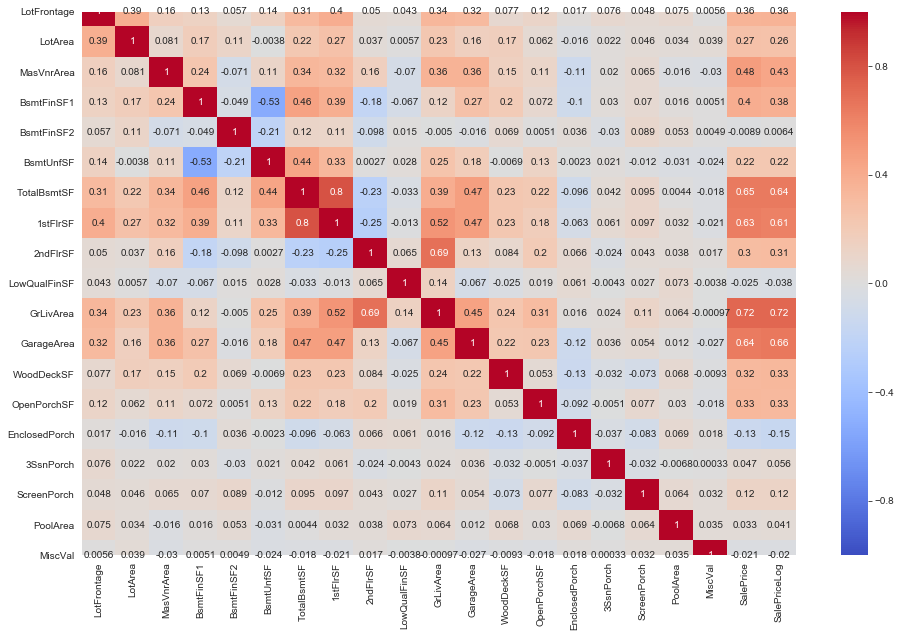

In [107]:
df_corr = train_numeric[features_cont + label].copy()
df_corr['SalePriceLog'] = np.log(df_corr['SalePrice']) 
corr = df_corr.corr()
sns.heatmap(corr.iloc[:-2, :], vmin=-1, cmap='coolwarm',annot=True);

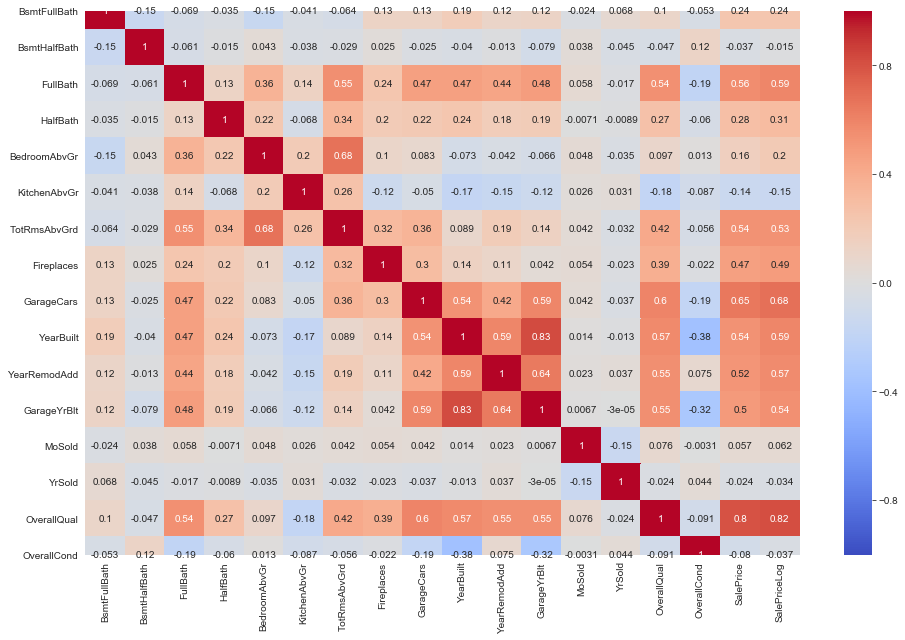

In [108]:
df_corr = train_numeric[features_disc + features_time + features_ord + label].copy()
df_corr['SalePriceLog'] = np.log(df_corr['SalePrice']) 
corr = df_corr.corr()
sns.heatmap(corr.iloc[:-2, :], vmin=-1, cmap='coolwarm',annot=True);